In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("F-F_Research_Data_5_Factors_2x3.csv")
data['MonthYr'] = pd.to_datetime(data['Unnamed: 0'],format="%Y%m")
data = data.loc[(data['MonthYr']>="1963-07-01")&(data['MonthYr']<="2022-10-01")]
data

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF,MonthYr
0,196307,-0.39,-0.41,-0.97,0.68,-1.18,0.27,1963-07-01
1,196308,5.07,-0.80,1.80,0.36,-0.35,0.25,1963-08-01
2,196309,-1.57,-0.52,0.13,-0.71,0.29,0.27,1963-09-01
3,196310,2.53,-1.39,-0.10,2.80,-2.01,0.29,1963-10-01
4,196311,-0.85,-0.88,1.75,-0.51,2.24,0.27,1963-11-01
...,...,...,...,...,...,...,...,...
707,202206,-8.43,1.30,-5.97,1.85,-4.70,0.06,2022-06-01
708,202207,9.57,1.87,-4.10,0.68,-6.94,0.08,2022-07-01
709,202208,-3.77,1.51,0.31,-4.80,1.30,0.19,2022-08-01
710,202209,-9.35,-1.00,0.03,-1.50,-0.85,0.19,2022-09-01


## Q1.1

Text(0, 0.5, 'RMW')

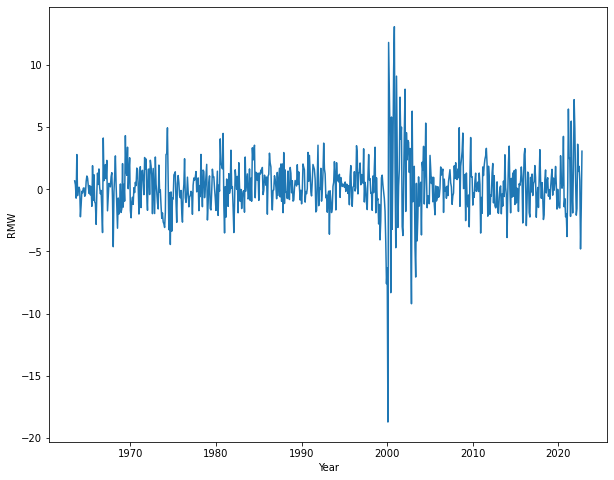

In [3]:
# rmw = data.loc[(data['MonthYr']>="1963-07-01")&(data['MonthYr']<="2022-10-01"),'RMW']
plt.figure(figsize=(10,8))
plt.plot(data['MonthYr'],data['RMW'])
plt.xlabel("Year")
plt.ylabel("RMW")

In [4]:
print("Mean:",12*data['RMW'].mean(),"\nStandard Deviation:",data['RMW'].std()*(12**0.5))

Mean: 3.286348314606742 
Standard Deviation: 7.675554575009212


## Q1.2

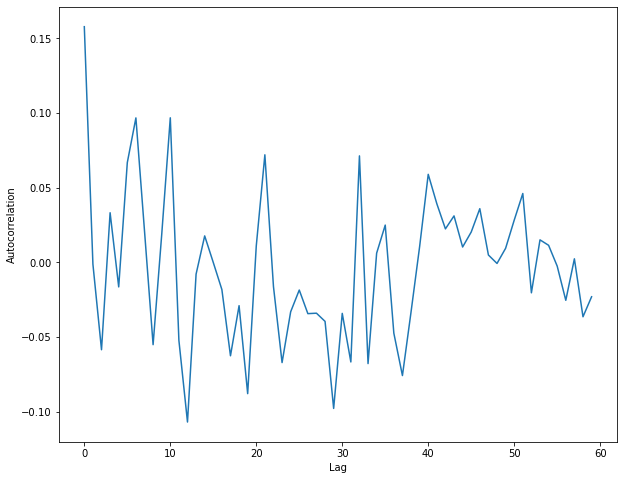

In [5]:
autocorr = [data['RMW'].autocorr(k) for k in range(1,61)]

plt.figure(figsize=(10,8))
plt.plot(autocorr)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

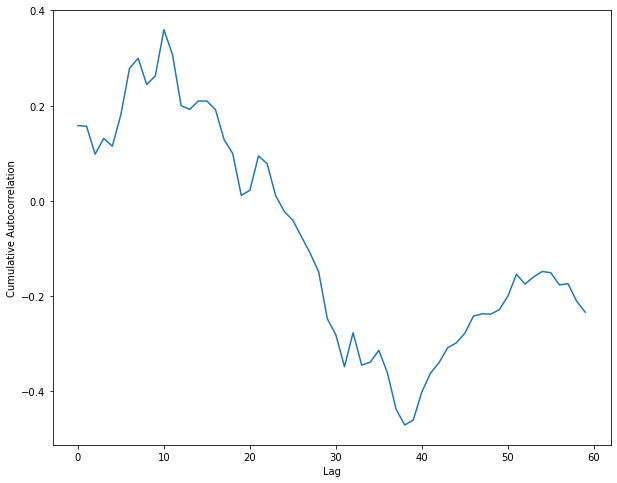

In [6]:
cum_autocorr = np.cumsum(autocorr)
plt.figure(figsize=(10,8))
plt.plot(cum_autocorr)
plt.xlabel("Lag")
plt.ylabel("Cumulative Autocorrelation")
plt.show()

## Q1.3

In [10]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(data['RMW'], lags=[6], return_df=True)

,lb_stat,lb_pvalue
6,24.3538,0.00045


$$Q = n\times (n+2)\times \frac{\sum_{r=1}^{6}r^2}{1-\sum_{r=1}^{6}r}$$